In [11]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [9]:
#fetching from the dataset
mnist = fetch_openml('mnist_784')

In [10]:
x, y = mnist['data'], mnist['target']

In [12]:
some_digit = x.to_numpy()[36002]
some_digit_image = some_digit.reshape(28, 28)

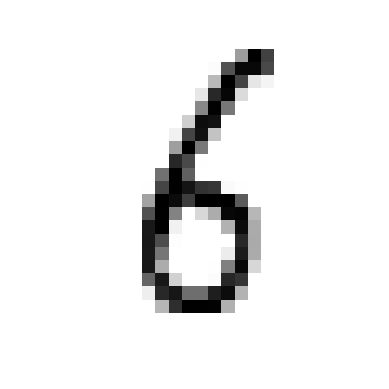

In [14]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis("off")
plt.show()

In [15]:
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

In [16]:
shuffle_index = np.random.permutation(60000)
x_train, y_train= x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

In [17]:
#building 2-detector
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 6)
y_test_2 = (y_test == 6)

In [18]:
#Training a Logistic Regression Classifier
clf = LogisticRegression(tol=0.1)
clf.fit(x_train, y_train_2)
example = clf.predict([some_digit])
print(example)

[ True]


In [19]:
#Cross-Validation
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print(a.mean())

0.9847166666666668
